In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.integrate
import sklearn.decomposition
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.univariate_functional import UnivariateFunctionalData
from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.multivariate_functional import MultivariateFunctionalData
from FDApy.fpca import UFPCA, MFPCA
from FDApy.local_polynomial import LocalPolynomial
from FDApy.basis import *
from FDApy.plot import *
from FDApy.utils import *

# Tests different basis definition

In [2]:
# Define a Legendre polynomials basis
argvals = np.linspace(-1, 1, 1000)
LP = basis_legendre(M=5, argvals=argvals, norm=True)

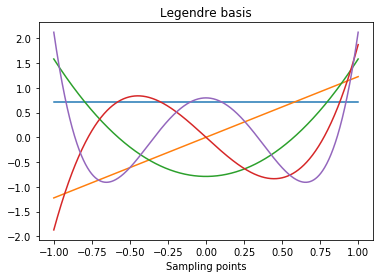

In [3]:
# Plot Legendre basis
fig, ax = plot(LP, main='Legendre basis', xlab='Sampling points')
plt.show()

In [4]:
# Define a Wiener process basis
argvals = np.linspace(0, 1, 1000)
WP = basis_wiener(M=5, argvals=argvals, norm=True)

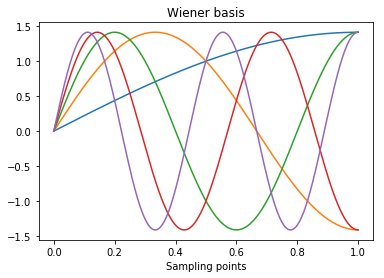

In [5]:
# Plot Wiener basis
fig, ax = plot(WP, main='Wiener basis', xlab='Sampling points')
plt.show()

# Simulate some curves

In [6]:
# Simulate some functions using the Legendre basis and exponential eigenvalues
sim = Simulation(basis='legendre', M=5, eigenvalues='exponential')
sim.new(argvals=tuple(np.linspace(0, 1, 100)), N=100)

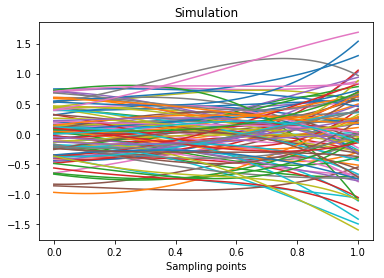

In [7]:
# Plot some simulations
fig, ax = plot(sim.obs, main='Simulation', xlab='Sampling points')
plt.show()

In [8]:
# Simulate some functions using the Legendre basis and linear eigenvalues
sim = Simulation(basis='legendre', M=5, eigenvalues='linear')
sim.new(argvals=tuple(np.linspace(0, 1, 100)), N=100)

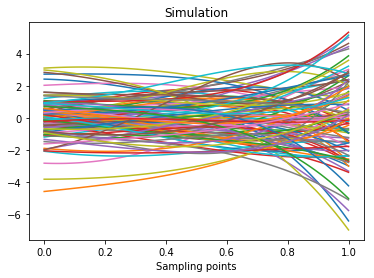

In [9]:
# Plot some simulations
fig, ax = plot(sim.obs, main='Simulation', xlab='Sampling points')
plt.show()

In [10]:
# Simulate some functions using the Wiener basis and those eigenvalues
sim = Simulation(basis='wiener', M=5, eigenvalues='wiener')
sim.new(argvals=tuple(np.linspace(0, 1, 100)), N=100)

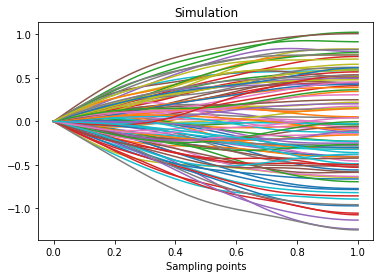

In [11]:
# Plot some simulations
fig, ax = plot(sim.obs, main='Simulation', xlab='Sampling points')
plt.show()

In [12]:
# Simulate some functions using the Wiener basis and given eigenvalue
sim = Simulation(basis='wiener', M=3, eigenvalues=[100, 25, 5])
sim.new(argvals=tuple(np.linspace(0, 1, 100)), N=100)

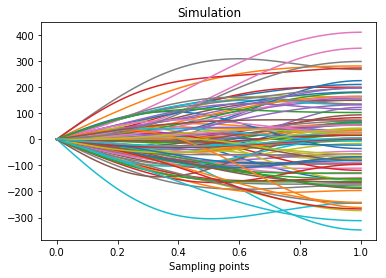

In [13]:
# Plot some simulations
fig, ax = plot(sim.obs, main='Simulation', xlab='Sampling points')
plt.show()

In [14]:
# Add some noise to the simulation.
sim.add_noise(0.01)

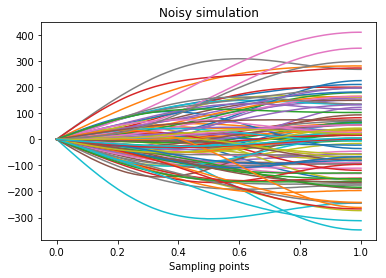

In [15]:
# Plot the noisy simulations
fig, ax = plot(sim.noisy_obs, main='Noisy simulation', xlab='Sampling points')
plt.show()

In [16]:
# Add some heteroscedastic noise to the simulation
sim.add_noise(sd_function=lambda x: np.sqrt(np.abs(x) + 1))

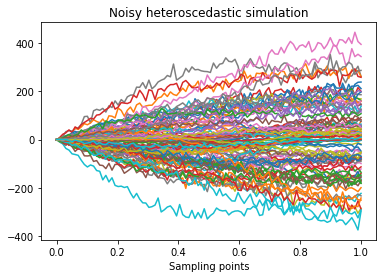

In [17]:
# Plot the heteroscedastic noisy simulations
fig, ax = plot(sim.noisy_obs, main='Noisy heteroscedastic simulation', xlab='Sampling points')
plt.show()

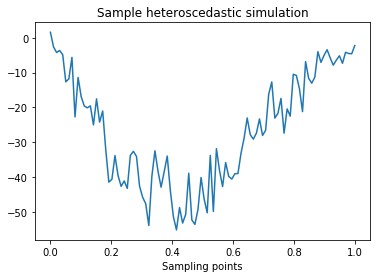

In [18]:
# Plot only one curves of heteroscedastic noise simulation
fig, ax = plot(sim.noisy_obs[2], main = 'Sample heteroscedastic simulation', xlab='Sampling points')
plt.show()